In [1]:
import cv2                                # state of the art computer vision algorithms library
import numpy as np                        # fundamental package for scientific computing
import matplotlib.pyplot as plt           # 2D plotting library producing publication quality figures
from pyntcloud import PyntCloud # open source library for 3D pointcloud visualisation
import pyrealsense2 as rs                 # Intel RealSense cross-platform open-source API
print("Environment Ready")

Environment Ready


In [2]:
# # Setup:
pipe = rs.pipeline()
# cfg = rs.config()
# rs.config.enable_device_from_file(cfg, '/home/xipeng/Documents/20190304_011637.bag')
# cfg.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
# cfg.enable_stream(rs.stream.color, 640, 480, rs.format.rgb8, 30)
    
# profile = pipe.start(cfg)


# pipeline = rs.pipeline()

# Create a config object
config = rs.config()
# Tell config that we will use a recorded device from filem to be used by the pipeline through playback.
rs.config.enable_device_from_file(config, '/home/xipeng/Documents/20190401_154953.bag')
config.enable_stream(rs.stream.depth, 1280, 720, rs.format.z16, 30)
config.enable_stream(rs.stream.color, 1280, 720, rs.format.rgb8, 30)

# Filters
decimation = rs.decimation_filter()
decimation.set_option(rs.option.filter_magnitude, 4)
spatial = rs.spatial_filter()
spatial.set_option(rs.option.filter_magnitude, 5)
spatial.set_option(rs.option.filter_smooth_alpha, 1)
spatial.set_option(rs.option.filter_smooth_delta, 50)
spatial.set_option(rs.option.holes_fill, 3)
temporal = rs.temporal_filter()
hole_filling = rs.hole_filling_filter()
depth_to_disparity = rs.disparity_transform(True)
disparity_to_depth = rs.disparity_transform(False)



# Start streaming from file
profile  = pipe.start(config)


# Skip 5 first frames to give the Auto-Exposure time to adjust
for x in range(5):
  pipe.wait_for_frames()

frames = []
for x in range(10):
    frameset = pipe.wait_for_frames()
    frames.append(frameset.get_depth_frame())

# Store next frameset for later processing:
color_frame = frameset.get_color_frame()


depth_image = np.asanyarray(frameset.get_depth_frame().get_data())
print(np.shape(depth_image))

depth_frame = frameset.get_depth_frame()
pc=rs.pointcloud()
pc.map_to(color_frame)
points=pc.calculate(depth_frame)
vertices=np.asanyarray(points.get_vertices())
print(vertices[30000])
print(vertices.shape)
# for x in range(10):
#     depth_frame = frames[x]
#     depth_frame = decimation.process(depth_frame)
#     depth_frame = depth_to_disparity.process(depth_frame)
#     depth_frame = spatial.process(depth_frame)
#     depth_frame = temporal.process(depth_frame)
#     depth_frame = disparity_to_depth.process(depth_frame)
#     depth_frame = hole_filling.process(depth_frame)

# Cleanup:
pipe.stop()
print("Frames Captured")

(720, 1280)
<class 'numpy.void'>
(921600,)
Frames Captured


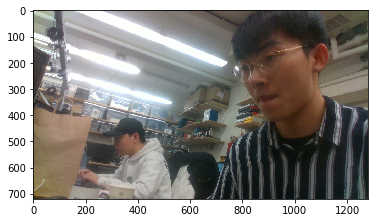

In [3]:
color = np.asanyarray(color_frame.get_data())
plt.rcParams["axes.grid"] = False
plt.imshow(color)

In [4]:
type(color_frame)

pyrealsense2.pyrealsense2.video_frame

In [5]:
pc = rs.pointcloud()
pc.map_to(color_frame)
pointcloud = pc.calculate(depth_frame)
vtx = np.asarray(points.get_vertices())
pointcloud.export_to_ply("1.ply", color_frame)

In [6]:
# examples/Python/Basic/visualization.py

import numpy as np
from open3d import *

if __name__ == "__main__":

    print("Load a ply point cloud, print it, and render it")
    pcd = read_point_cloud("1.ply")
   
#     draw_geometries([pcd])
    print(pcd.points)

Load a ply point cloud, print it, and render it
std::vector<Eigen::Vector3d> with 726167 elements.
Use numpy.asarray() to access data.


In [7]:
# import pyrealsense2 as rs


# # Declare pointcloud object, for calculating pointclouds and texture mappings
# pc = rs.pointcloud()
# # We want the points object to be persistent so we can display the last cloud when a frame drops
# points = rs.points()

# # Declare RealSense pipeline, encapsulating the actual device and sensors
# pipe = rs.pipeline()
# #Start streaming with default recommended configuration
# pipe.start();

# try:
#     # Wait for the next set of frames from the camera
#     frames = pipe.wait_for_frames()

#     # Fetch color and depth frames
#     depth = frames.get_depth_frame()
#     color = frames.get_color_frame()

#     # Tell pointcloud object to map to this color frame
#     pc.map_to(color)

#     # Generate the pointcloud and texture mappings
#     points = pc.calculate(depth)
    
#     print(points)
    

#     print("Saving to 1.ply...")
#     points.export_to_ply("1.ply", color)
#     print("Done")
# finally:
#     pipe.stop()

In [8]:
depth_sensor = profile.get_device().first_depth_sensor()
depth_scale = depth_sensor.get_depth_scale()

In [9]:
depth_scale

0.0020000000949949026

In [10]:
depth_image = np.asanyarray(depth_frame.get_data())
color_image = np.asanyarray(color_frame.get_data())
print(np.shape(depth_image))
depth = depth_image[320,240].astype(float)
distance = depth * depth_scale
print ("Distance (m): ", distance )

(720, 1280)
Distance (m):  4.848000230267644


In [11]:
import copy
import numpy as np
from open3d import *

if __name__ == "__main__":

    # generate some neat n times 3 matrix using a variant of sync function
    x = np.linspace(-3, 3, 401)
    mesh_x, mesh_y = np.meshgrid(x,x)
    z = np.sinc((np.power(mesh_x,2)+np.power(mesh_y,2)))
    z_norm = (z-z.min())/(z.max()-z.min())
    xyz = np.zeros((np.size(mesh_x),3))
    xyz[:,0] = np.reshape(mesh_x,-1)
    xyz[:,1] = np.reshape(mesh_y,-1)
    xyz[:,2] = np.reshape(z_norm,-1)
    print('xyz')
#     print(xyz)
    print(np.shape(np.reshape(mesh_x,-1)))
    print(np.shape(xyz))
    
    pcd = read_point_cloud("1.ply")
    xyz_my = np.asarray(pcd.points)
    print(np.shape(xyz_my))

#     # Pass xyz to Open3D.PointCloud and visualize
#     pcd = PointCloud()
#     pcd.points = Vector3dVector(xyz)
#     write_point_cloud("sync.ply", pcd)

#     # Load saved point cloud and visualize it
#     pcd_load = read_point_cloud("sync.ply")
#     draw_geometries([pcd_load])

#     # convert Open3D.PointCloud to numpy array
#     xyz_load = np.asarray(pcd_load.points)
#     print('xyz_load')
#     print(xyz_load)

#     # save z_norm as an image (change [0,1] range to [0,255] range with uint8 type)
#     img = Image((z_norm*255).astype(np.uint8))
#     write_image("../../TestData/sync.png", img)
#     draw_geometries([img])

xyz
(160801,)
(160801, 3)
(726167, 3)


In [37]:
print(type(vertices[30300]))
vertices.shape[0]
a = vertices


b = a.view(np.float32).reshape(a.shape + (-1,))
print(b.shape)
print(b[33000])
pcd = PointCloud()
pcd.points = Vector3dVector(b)

draw_geometries([pcd])

<class 'numpy.void'>
(921600, 3)
[ 1.3466519 -1.2364564  2.394    ]


In [1]:
import cv2                                # state of the art computer vision algorithms library
import numpy as np                        # fundamental package for scientific computing
import matplotlib.pyplot as plt           # 2D plotting library producing publication quality figures
from open3d import *                      # open source library for 3D pointcloud visualisation
import pyrealsense2 as rs                 # Intel RealSense cross-platform open-source API
print("Environment Ready")

Environment Ready


In [3]:
# # Setup:
pipe = rs.pipeline()

# Create a config object
config = rs.config()

# Tell config that we will use a recorded device from filem to be used by the pipeline through playback.
# rs.config.enable_device_from_file(config, '/home/xipeng/Documents/20190401_154953.bag'

# Read from camera live
config.enable_stream(rs.stream.depth, 1280, 720, rs.format.z16, 30)
config.enable_stream(rs.stream.color, 1280, 720, rs.format.rgb8, 30)

# Start streaming from file
profile  = pipe.start(config)


# Skip 5 first frames to give the Auto-Exposure time to adjust
for x in range(5):
  pipe.wait_for_frames()

frameset = pipe.wait_for_frames()

# Store next frameset for later processing:
color_frame = frameset.get_color_frame()
depth_frame = frameset.get_depth_frame()

depth_image = np.asanyarray(depth_frame.get_data())

pc=rs.pointcloud()
pc.map_to(color_frame)
pointcloud=pc.calculate(depth_frame)
vertices=np.asanyarray(pointcloud.get_vertices())
pointcloud.export_to_ply("1.ply", color_frame)

# Cleanup:
pipe.stop()
print("Frames Captured")

Frames Captured


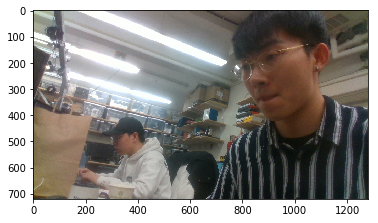

In [4]:
color = np.asanyarray(color_frame.get_data())
plt.rcParams["axes.grid"] = False
plt.imshow(color)

In [5]:
# View the Point Cloud from array
b = vertices.view(np.float32).reshape(vertices.shape + (-1,))
pcd = PointCloud()
pcd.points = Vector3dVector(b)
draw_geometries([pcd])

In [7]:
# View the Point Cloud from file
pcd = read_point_cloud("1.ply")
draw_geometries([pcd])